# Main Cluster's Polygons (Areas Algorithm)

In this notebook we will show how to obtain the main cluster of the set of polygons of the Quasiperiodic Lattice Neighborhood around an arbitrary point.

Contrary to the previous algorithm, in this one we will use the result that the maximum area of the Voronoi's polygons generated by the set of centroids of the Quasiperiodic polygons that correspond to the centroids of the polygons inside a cluster in the quasiperiodic lattice is bounded by a value near to one, so the isolated polygons (and the outer layers of the clusters) will be eliminated by this algorithm.

We can have small clusters besides the main cluster, in this case the algorithm could not eliminate those in one iteration, so may be necessary iterate this area discrimination algorithm more than once.

Let's load the files that will be used in this notebook.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("voronoi.jl")
include("Algoritmo_Voronoi.jl")
include("Algoritmo_Cluster_Principal_Iterado.jl")

centroides_Area_Acotada_Iterada (generic function with 1 method)

We will use the package "Plots" to visualize the polygons of the Neighborhood and the Voronoi's polygons. So, let's load it.

In [2]:
using Plots

### Information about the Quasiperiodic Lattice

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 5; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

### Neighborhood of the quasiperiodic lattice around an arbitrary point

First, let's get the set of points that will define the polygons in the quasiperiodic lattice around an arbitrary point

In [4]:
N = 5; #Margin of error in the integer numbers generated as the projection of the arbitrary point into the star vectors
SL = 1e7; #Size of a half side of the square in which the algorithm generate a random point inside it

#Let's generate the arbitrary point around which we will generate the neighborhood
APoint = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    APoint = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    APoint = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    APoint = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    APoint = [-rand()*SL, -rand()*SL];
end

#Let's get the coordinates of the vertices of the polygons, also get the coordinates of the point around which
#the neighborhood was generated
Dual_Points = region_Local_Voronoi(N, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint);

#Let's get the coordinates as tuples of the centroids and the dictionary that relates the centroid's coordinates 
#with the polygons vertices' coordinates of the polygon that generate the centroid.
Centroids, Centroids_Dictionary = centroides(Dual_Points);

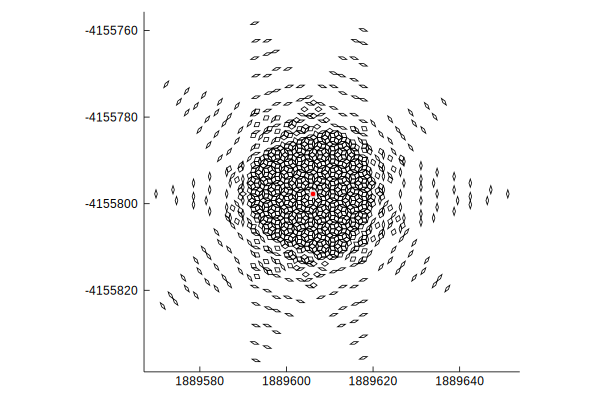

In [5]:
#Coordinates X,Y for the vertices of the quasiperiodic lattice.
X_Vertices, Y_Vertices = separacion_Arreglo_de_Arreglos_2D(Dual_Points);

#Let's visualize the neighborhood of the quasiperiodic lattice
plot()
for i in 1:4:length(X_Vertices)
    plot!([X_Vertices[i],X_Vertices[i+1],X_Vertices[i+2],X_Vertices[i+3],X_Vertices[i]],[Y_Vertices[i],Y_Vertices[i+1],Y_Vertices[i+2],Y_Vertices[i+3],Y_Vertices[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([APoint[1]], [APoint[2]], color = "red") #Graph the arbitrary point as a red circle
#plot!(xlimit = [APoint[1]-13, APoint[1]+13], ylimit = [APoint[2]-13, APoint[2]+13])

### First iteration of the areas algorithm

Now, let's show how the set of polygons change when we apply a first iteration of the algorithm based in the areas discrimination.

First, let's get the structure of the Voronoi's polygons associated with this polygons

In [6]:
#Let's get the initial Voronoi's Lattice
sites = [(Centroids[i][1], Centroids[i][2]) for i in 1:length(Centroids)]
Initial_Voronoi = getVoronoiDiagram(sites);

Then, let's get the centroids whose their Voronoi's polygons has an area less than a bounded value.

In [7]:
Bounded_Area = 1.2; #The value for the area of the polygons that will be a discriminator value in the areas algorithm

#Let's get the centroids whose Voronoi's polygons has an area smaller than the Bounded_Area
Inside_Clusters_Centroids = centroides_Area_Acotada(Initial_Voronoi, Bounded_Area);

#Let's get the X and Y coordinates of the vertices of the retained polygons in the quasiperiodic lattice
X,Y = centroides_A_Vertices(Inside_Clusters_Centroids, Centroids_Dictionary);

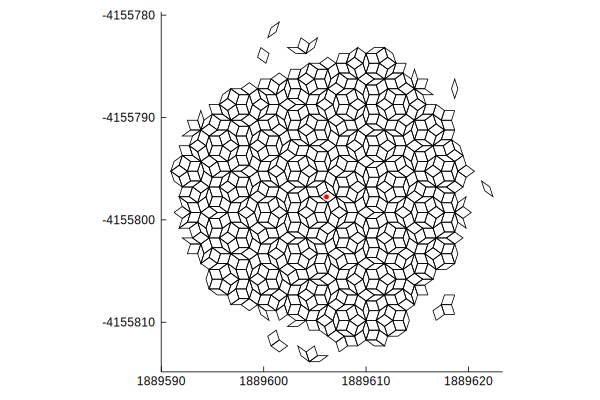

In [8]:
#Let's visualize the new neighborhood of the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([APoint[1]], [APoint[2]], color = "red") #Graph the arbitrary point as a red circle
#plot!(xlimit = [APoint[1]-13, APoint[1]+13], ylimit = [APoint[2]-13, APoint[2]+13])

As we comment in the introduction of the notebook, one iteration of the algorithm may not be enough to get just the main cluster, so let's iterate again.

### Second iteration of the areas algorithm

In [9]:
#Let's get the Voronoi's Lattice
sites = [(Inside_Clusters_Centroids[i][1], Inside_Clusters_Centroids[i][2]) for i in 1:length(Inside_Clusters_Centroids)]
Voronoi = getVoronoiDiagram(sites);

In [10]:
Bounded_Area = 1.2; #The value for the area of the polygons that will be a discriminator value in the areas algorithm

#Let's get the centroids whose Voronoi's polygons has an area smaller than the Bounded_Area
Inside_Clusters_Centroids = centroides_Area_Acotada(Voronoi, Bounded_Area);

#Let's get the X and Y coordinates of the vertices of the retained polygons in the quasiperiodic lattice
X,Y = centroides_A_Vertices(Inside_Clusters_Centroids, Centroids_Dictionary);

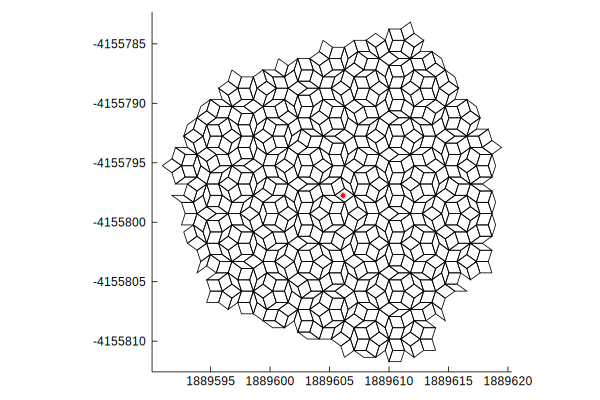

In [11]:
#Let's visualize the new neighborhood of the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([APoint[1]], [APoint[2]], color = "red") #Graph the arbitrary point as a red circle
#plot!(xlimit = [APoint[1]-13, APoint[1]+13], ylimit = [APoint[2]-13, APoint[2]+13])

After two iterations, now we have just the main cluster.

Now, let's check how to use the function that iterate the previous algorithm.

### Iterated areas algorithm

Let's generate the information requiered to generate the quasiperiodic lattice around an arbitrary point and get those polygons.

In [12]:
NSides = 200; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

In [13]:
N = 0; #Margin of error in the integer numbers generated as the projection of the arbitrary point into the star vectors
SL = 1e7; #Size of a half side of the square in which the algorithm generate a random point inside it

#Let's generate the arbitrary point around which we will generate the neighborhood
APoint = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    APoint = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    APoint = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    APoint = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    APoint = [-rand()*SL, -rand()*SL];
end

#Let's get the coordinates of the vertices of the polygons, also get the coordinates of the point around which
#the neighborhood was generated
Dual_Points = region_Local_Voronoi(N, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint);

#Let's get the coordinates as tuples of the centroids and the dictionary that relates the centroid's coordinates 
#with the polygons vertices' coordinates of the polygon that generate the centroid.
Centroids, Centroids_Dictionary = centroides(Dual_Points);

Now let's define how many iterations we would like to apply and let's apply them.

In [14]:
Iterations = 25; #Number of iterations of the areas algorithm desired.
Bounded_Area = 1.2; #The value for the area of the polygons that will be a discriminator value in the areas algorithm

#Let's get the centroids that remains after the iterations of the areas algorithm
Inside_Clusters_Centroids = centroides_Area_Acotada_Iterada(Centroids, Bounded_Area, Iterations);

#Let's get the X and Y coordinates of the vertices of the retained polygons in the quasiperiodic lattice
X,Y = centroides_A_Vertices(Inside_Clusters_Centroids, Centroids_Dictionary);

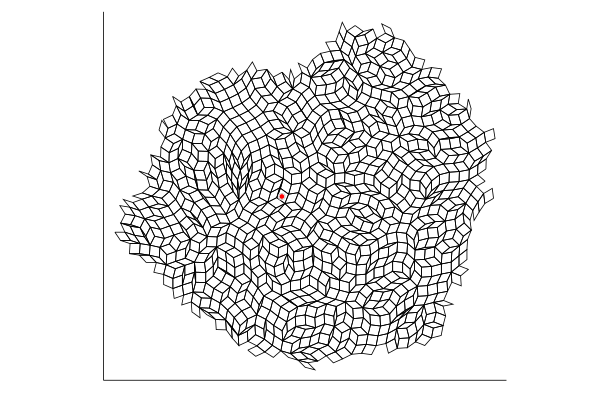

In [15]:
#Let's visualize the new neighborhood of the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black, xaxis = nothing, yaxis = nothing)
end
scatter!([APoint[1]], [APoint[2]], color = "red", xaxis = nothing, yaxis = nothing) #Graph the arbitrary point as a red circle
#plot!(xlimit = [APoint[1]-13, APoint[1]+13], ylimit = [APoint[2]-13, APoint[2]+13])

Note that the algorithm let us visualize the main cluster of high symmetry's quasiperiodic lattices, for example, the above image correspond to a symmetry of 200.